# **Try It Yourself**
### *Chapter 16* - **Downloading Data**
---

**16-1. Sitka Rainfall**: 
    
Sitka is in a temperate rainforest, so it gets a fair amount of
rainfall. In the data file sitka_weather_2018_simple.csv is a header called PRCP,
which represents daily rainfall amounts. Make a visualization focusing on the
data in this column. You can repeat the exercise for Death Valley if you’re curious how little rainfall occurs in a desert.

In [21]:
file_path = 'D:/Data Science/Python/Practical Books/Python Crash Course/Jupyter Notebooks/Part II - Proyects/Proyect II - Data Visualization/data/sitka_weather_2018_simple.csv'

import csv
with open(file_path) as f:
    reader = csv.reader(f)
    cols = next(reader)
    for index,col in enumerate(cols):
        print(f"[{index}] {col}")

[0] STATION
[1] NAME
[2] DATE
[3] PRCP
[4] TAVG
[5] TMAX
[6] TMIN


In [14]:
from datetime import datetime

with open(file_path) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    # Get dates and high temperatures from this file.
    dates, prcps = [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        prcp = float(row[3])
        dates.append(current_date)
        prcps.append(prcp)

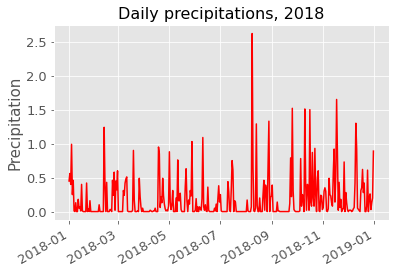

In [17]:
import matplotlib.pyplot as plt

# Plot the high temperatures.
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(dates, prcps, c='red')

# Format plot.
plt.title("Daily precipitations, 2018", fontsize=16)

plt.xlabel('', fontsize=15)
plt.ylabel("Precipitation", fontsize=15)
fig.autofmt_xdate()  
plt.tick_params(axis='both', which='major', labelsize=13)

plt.show()

**16-2. Sitka–Death Valley Comparison**: 

The temperature scales on the Sitka and
Death Valley graphs reflect the different data ranges. To accurately compare
the temperature range in Sitka to that of Death Valley, you need identical
scales on the y-axis. Change the settings for the y-axis on one or both of the
charts in Figures 16-5 and 16-6. Then make a direct comparison between
temperature ranges in Sitka and Death Valley (or any two places you want to
compare).

In [37]:
import csv
from datetime import datetime

file_path = 'D:/Data Science/Python/Practical Books/Python Crash Course/Jupyter Notebooks/Part II - Proyects/Proyect II - Data Visualization/data/sitka_weather_2018_simple.csv'

with open(file_path) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    # Get dates and high temperatures from this file.
    dates_sitka, highs_sitka, lows_sitka = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        high = int(row[5])
        low = int(row[6])
        dates_sitka.append(current_date)
        highs_sitka.append(high)
        lows_sitka.append(low)

In [38]:
import csv
from datetime import datetime

file_path = 'D:/Data Science/Python/Practical Books/Python Crash Course/Jupyter Notebooks/Part II - Proyects/Proyect II - Data Visualization/data/death_valley_2018_simple.csv'

with open(file_path) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    # Get dates and high temperatures from this file.
    dates_valley, highs_valley, lows_valley = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        try:
            high = int(row[4])
            low = int(row[5])
        except ValueError:
            print(f"Missing data for {current_date}")
        else:
            dates_valley.append(current_date)
            highs_valley.append(high)
            lows_valley.append(low)

Missing data for 2018-02-18 00:00:00


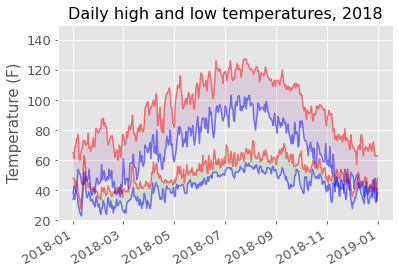

In [43]:
import matplotlib.pyplot as plt

# Plot the high temperatures.
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.plot(dates_valley, highs_valley, c='red', alpha=0.5)                              
ax.plot(dates_valley, lows_valley, c='blue', alpha=0.5)                               
plt.fill_between(dates_valley, highs_valley, lows_valley, facecolor='purple', alpha=0.1)

ax.plot(dates_sitka, highs_sitka, c='red', alpha=0.5)                              
ax.plot(dates_sitka, lows_sitka, c='blue', alpha=0.5)                               
plt.fill_between(dates_sitka, highs_sitka, lows_sitka, facecolor='green', alpha=0.1)

# Format plot.
plt.title("Daily high and low temperatures, 2018", fontsize=16)

plt.xlabel('', fontsize=15)
plt.ylabel("Temperature (F)", fontsize=15)
fig.autofmt_xdate() # draws thedate labels diagonally 
plt.tick_params(axis='both', which='major', labelsize=13)

plt.ylim(20, 150)

plt.show()

**16-3. San Francisco**: 
    
Are temperatures in San Francisco more like temperatures in Sitka or temperatures in Death Valley? Download some data for San
Francisco, and generate a high-low temperature plot for San Francisco to make a comparison.

**16-4. Automatic Indexes**: 
    
In this section, we hardcoded the indexes corresponding to the TMIN and TMAX columns. Use the header row to determine the indexes for these values, so your program can work for Sitka or Death Valley. Use the
station name to automatically generate an appropriate title for your graph as well.

**16-5. Explore**: 
    
Generate a few more visualizations that examine any other
weather aspect you’re interested in for any locations you’re curious about.

**16-6. Refactoring**: 

The loop that pulls data from `all_eq_dicts` uses variables for
the magnitude, longitude, latitude, and title of each earthquake before appending these values to their appropriate lists. This approach was chosen for clarity in how to pull data from a JSON file, but it’s not necessary in your code.
Instead of using these temporary variables, pull each value from `eq_dict` and
append it to the appropriate list in one line. Doing so should shorten the body
of this loop to just four lines.

In [4]:
import json

filename = 'D:/Data Science/Python/Practical Books/Python Crash Course/Jupyter Notebooks/Part II - Proyects/Proyect II - Data Visualization/data/eq_data_30_day_m1.json'

with open(filename) as f:
    all_eq_data = json.load(f)

all_eq_dicts = all_eq_data['features']

mags = [eq_dict['properties']['mag'] for eq_dict in all_eq_dicts]
lons = [eq_dict['geometry']['coordinates'][0] for eq_dict in all_eq_dicts]
lats = [eq_dict['geometry']['coordinates'][1] for eq_dict in all_eq_dicts]
hower_texts = [eq_dict['properties']['title'] for eq_dict in all_eq_dicts]

print(mags[:10])
print(lons[:5])
print(lats[:5])
print(hower_texts[:10])

[0.96, 1.2, 4.3, 3.6, 2.1, 4, 1.06, 2.3, 4.9, 1.8]
[-116.7941667, -148.9865, -74.2343, -161.6801, -118.5316667]
[33.4863333, 64.6673, -12.1025, 54.2232, 35.3098333]
['M 1.0 - 8km NE of Aguanga, CA', 'M 1.2 - 11km NNE of North Nenana, Alaska', 'M 4.3 - 69km NNW of Ayna, Peru', 'M 3.6 - 126km SSE of Cold Bay, Alaska', 'M 2.1 - 21km NNW of Tehachapi, CA', 'M 4.0 - 57km SSW of Kaktovik, Alaska', 'M 1.1 - 8km SW of Anza, CA', 'M 2.3 - 65km ESE of Old Iliamna, Alaska', 'M 4.9 - Southwest Indian Ridge', 'M 1.8 - 52km ENE of Beatty, Nevada']


**16-7. Automated Title**: 

In this section, we specified the title manually when defining `my_layout`, which means we have to remember to update the title every time the source file changes. Instead, you can use the title for the data set in
the metadata part of the JSON file. Pull this value, assign it to a variable, and
use this for the title of the map when you’re defining `my_layout`.

In [9]:
title = all_eq_data["metadata"]["title"]
print(title)

USGS Magnitude 1.0+ Earthquakes, Past Month


In [10]:
from plotly.graph_objs import Scattergeo, Layout
from plotly import offline

# Map the earthquakes.
data = [{
    'type': 'scattergeo',
    'lon': lons,
    'lat': lats,
    'text': hower_texts,
    'marker': {
        'size': [3*mag for mag in mags],
        'color': mags,
        'colorscale': 'Bluered',
        'reversescale': False,
        'colorbar': {'title': 'Magnitude'}
    },
}]
my_layout = Layout(title=title)

fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='global_earthquakes_v5.html')

'global_earthquakes_v5.html'

**16-8. Recent Earthquakes**: 

You can find data files containing information about
the most recent earthquakes over 1-hour, 1-day, 7-day, and 30-day periods
online. Go to https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php
and you’ll see a list of links to data sets for various time periods, focusing on
earthquakes of different magnitudes. Download one of these data sets, and
create a visualization of the most recent earthquake activity.

**16-9. World Fires**: 

In the resources for this chapter, you’ll find a file called
world_fires_1_day.csv. This file contains information about fires burning in different locations around the globe, including the latitude and longitude, and the
brightness of each fire. Using the data processing work from the first part of
this chapter and the mapping work from this section, make a map that shows
which parts of the world are affected by fires.
You can download more recent versions of this data at https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/active-fire-data/. You can find links to the data in CSV format in the TXT section.

In [39]:
import csv

file_path = 'D:/Data Science/Python/Practical Books/Python Crash Course/Jupyter Notebooks/Part II - Proyects/Proyect II - Data Visualization/data/world_fires_1_day.csv'

with open(file_path) as f:
    reader = csv.reader(f)
    cols = next(reader)
    
    for index,col in enumerate(cols):
        print(f"[{index}] {col}")
        
    # Get lons, lats and brightness from this file.
    lats, lons, bris = [], [], []
    for row in reader:
        lat = float(row[0])
        lats.append(lat)
        lon = float(row[1])
        lons.append(lon)
        bri = float(row[2])
        bris.append(bri)

print("\n", lats[:10], lons[:10], bris[:10], sep = "\n")

[0] latitude
[1] longitude
[2] brightness
[3] scan
[4] track
[5] acq_date
[6] acq_time
[7] satellite
[8] confidence
[9] version
[10] bright_t31
[11] frp
[12] daynight


[-13.505, -0.38, -4.093, -5.938, -6.935, -6.937, -11.031, -11.042, -11.303, -11.399]
[-172.586, -160.008, 145.066, 147.053, 146.309, 146.325, 142.276, 142.285, 142.562, 142.285]
[310.6, 310.7, 312.7, 314.0, 314.9, 311.3, 325.4, 318.0, 319.6, 325.6]


In [44]:
from plotly.graph_objs import Scattergeo, Layout
from plotly import offline

# Map the fires.
data = [{
    'type': 'scattergeo',
    'lon': lons,
    'lat': lats,
    'marker': {
        'size': [bri/25 for bri in bris],
        'color': bris,
        'colorscale': 'Reds',
        'reversescale': False,
        'colorbar': {'title': 'Brightness'}
    },
}]
my_layout = Layout(title="Fires burning, past day")

fig = {'data': data, 'layout': my_layout}

filename = 'D:/Data Science/Python/Practical Books/Python Crash Course/Jupyter Notebooks/Part II - Proyects/Proyect II - Data Visualization/python_work/files/global_fires.html'
offline.plot(fig, filename=filename)

'D:/Data Science/Python/Practical Books/Python Crash Course/Jupyter Notebooks/Part II - Proyects/Proyect II - Data Visualization/python_work/files/global_fires.html'